## Resting state EEG (rsEEG) spectral changes associated with age

This notebook should show the steps used for preprocessing EEG for one subject.
What preprocessing steps are involved in preparing the EEG data for analysis?

Initial number of subject with EEG 201
Final number of subjects included: 181/171

- group of young adults (N=123)
- group of older adults (N=24) with higher education (12 years of lyceum/gimnasium)
- low education (N = 32) with 10 yearts of technical  hight school/Realschule

The data were processed in Brainstorm (Tadel et al., 2011) using the following steps:

The reconstructed sources were projected to Destrieux parcellation (citation needed)


In [2]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [3]:
from glob import glob
from pathlib import Path
import xarray as xr
import pandas as pd
import re
import numpy as np

from fooof import FOOOF
import seaborn as sb
import seaborn.objects as so

sb.set_style("whitegrid")

from  poirot.load_data import  load_mat_file, plot_psd_vs_freq_roi
from poirot.translate import define_region_dict, prepare_grouping
from poirot.spectrum import psd_fooof, fooof2pandas

def param_xarray(da):
    freqs = da.freqs.values
    spectra = da.values
    filtered_subs = da.sub.values
    fg = psd_fooof(freqs, spectra)
    df = fooof2pandas(fg)
    return(
        pd.DataFrame({"subject": filtered_subs, "ID": np.arange(len(filtered_subs))})
        .merge(df, on="ID")
        .drop(columns=["ID"])
    )

In [5]:
# | loop over all subject to plot the files

# Initialize a FOOOF object, with some settings

df_average = pd.read_csv("../data/occipital_data_OH_OL.csv").rename(
    columns={"mean_offset": "offset", "mean_exponent": "exponent"}
)
sub_list = df_average["subject"].values.tolist()

pandas_list = []
folder = "../data/lemon_rsEEG_dataset"
files_EC = [Path(p) for p in glob(f"{folder}/*/*EO.mat")]

regions_dict = define_region_dict()
# %%
my_objects = {}
regions_psd = []
for path_mat in files_EC:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    temp = load_mat_file(path_mat, sub)
    # temp_regions = temp
    if temp.freqs.values.size > 51:
        regions_psd.append(temp)
    my_objects[tuple(sub)] = my_objects.get(tuple(sub), temp)

# Exclude 2 subject who were anlysed up to 50 Hz, they have much differnt fits

age_edu_dict = {
    level: df_average.query("`Y_OH_OL` == @level")
    .loc[:, ["subject"]]
    .T.values.tolist()[0]
    for level in ["O_H", "O_L", "Y_H"]
}

age_edu_array = [  # assing specific coordinates
    key
    for element in da_occipital.sub.values
    for key, value in my_dict.items()
    if element in value

da = xr.concat(regions_psd[0:10], dim="sub", coords="all", join="override")


regions_ar = prepare_grouping(da, "roi_names",define_region_dict() )
age_edu_ar = prepare_grouping(da, "roi_names",age_edu_array  )
    .
# ns_dict

In [10]:
da = xr.merge( my_objects)


TypeError: objects must be an iterable containing only Dataset(s), DataArray(s), and dictionaries.

In [6]:

xr.concat(regions_psd[0:10], dim="sub", coords="all", join="override")

<xarray.DataArray (roi_names: 68, sub: 10, freqs: 126)>
array([[[2.64218583e-19, 8.42460876e-19, 1.20080515e-18, ...,
         6.79333660e-24, 6.77413781e-24, 6.71110647e-24],
        [3.11343581e-19, 1.05302923e-18, 1.44404986e-18, ...,
         1.10439472e-23, 1.11640313e-23, 1.10387296e-23],
        [7.15478075e-19, 2.26198446e-18, 2.88922688e-18, ...,
         1.88729577e-23, 1.95033620e-23, 1.88562177e-23],
        ...,
        [3.77576770e-19, 1.20382406e-18, 1.70541259e-18, ...,
         4.17046283e-24, 4.15487495e-24, 4.15497523e-24],
        [5.41188588e-19, 1.82141442e-18, 2.78217205e-18, ...,
         3.43292478e-23, 3.22684574e-23, 3.59175680e-23],
        [7.00737815e-19, 2.32386923e-18, 2.66188705e-18, ...,
         2.04009146e-23, 2.07263815e-23, 1.94294398e-23]],

       [[3.76390843e-19, 1.25039251e-18, 1.79509549e-18, ...,
         9.72727180e-24, 9.25113000e-24, 9.72082663e-24],
        [4.56652479e-19, 1.48201833e-18, 1.89598298e-18, ...,
         1.38615253e-23, 1.32003804e-23, 1.30206698e-23],
        [6.97412989e-19, 2.30287096e-18, 2.93462503e-18, ...,
         2.97041172e-23, 3.18446707e-23, 2.95588209e-23],
...
        [1.49300360e-19, 4.73345118e-19, 6.86885850e-19, ...,
         1.59436948e-24, 1.58966965e-24, 1.58962869e-24],
        [2.05029130e-19, 7.00610437e-19, 1.00499183e-18, ...,
         3.02433911e-23, 2.74579112e-23, 3.18574423e-23],
        [3.84398591e-19, 1.24475159e-18, 1.30692393e-18, ...,
         1.02426321e-23, 1.05758752e-23, 9.94467611e-24]],

       [[1.00818209e-19, 3.31222923e-19, 5.01443017e-19, ...,
         4.12787790e-24, 4.03025992e-24, 4.11748473e-24],
        [1.25973092e-19, 4.14627708e-19, 5.35117735e-19, ...,
         4.03992393e-24, 3.90100658e-24, 3.82688228e-24],
        [2.20957485e-19, 7.46724924e-19, 9.66554820e-19, ...,
         1.62109659e-23, 1.79802837e-23, 1.61454979e-23],
        ...,
        [1.45087054e-19, 4.59614084e-19, 6.32564107e-19, ...,
         1.59441997e-24, 1.59160025e-24, 1.59121200e-24],
        [2.22725470e-19, 7.44562950e-19, 1.07427075e-18, ...,
         3.24796254e-23, 3.05445925e-23, 3.08535469e-23],
        [2.74988209e-19, 8.84841585e-19, 9.91344385e-19, ...,
         5.20039468e-24, 5.26775366e-24, 5.14887058e-24]]])
Coordinates:
  * roi_names  (roi_names) <U26 'bankssts L' ... 'transversetemporal R'
  * sub        (sub) <U10 'sub-032412' 'sub-032415' ... 'sub-032446'
  * freqs      (freqs) float64 0.0 1.0 2.0 3.0 4.0 ... 122.0 123.0 124.0 125.0

In [202]:
da = xr.concat(regions_psd, dim="sub", coords="all", join="override")
da.regions.values

array([['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal'],
       ['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal'],
       ['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal'],
       ...,
       ['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal'],
       ['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal'],
       ['temporal', 'temporal', 'cingulate', ..., 'temporal', 'temporal',
        'temporal']], dtype='<U9')

In [ ]:
da_occipital = (
    xr.concat(regions_psd, dim="sub", coords="all", join="override")
    .groupby("regions")
    .mean(dim="roi_names")
    .sel(sub=sub_list)
    .loc[dict(regions="occipital")]
)

In [ ]:

]

da_cond = (
    da_occipital.assign_coords(Y_OH_OL=("sub", condition_array))
    .groupby("Y_OH_OL")
    .mean(dim="sub")
    .to_dataframe('power')
)

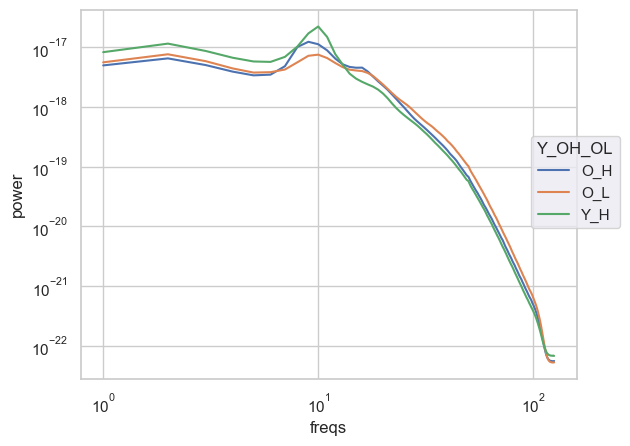

In [192]:
import matplotlib.pyplot as plt

p = (
    so.Plot(df_cond, x="freqs", y="power", color="Y_OH_OL")
    .add(so.Line())
    .scale(y="log")
    .scale(x="log")
)

f, ax = plt.subplots()
p.on(ax).show()


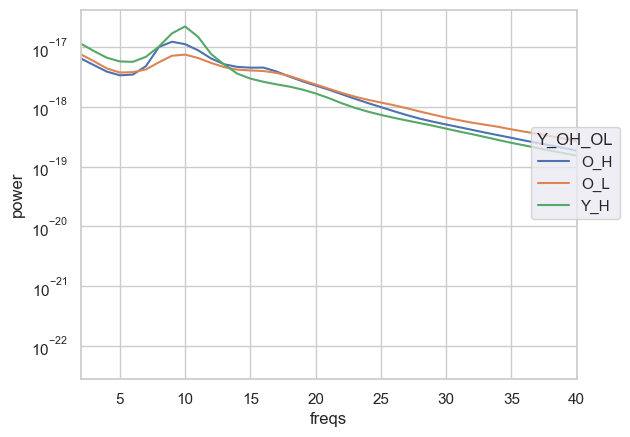

In [196]:
import matplotlib.pyplot as plt

p = (
    so.Plot(df_cond, x="freqs", y="power", color="Y_OH_OL")
    .add(so.Line())
    .scale(y="log")
    .limit(x = (2,40))
)

f, ax = plt.subplots()
p.on(ax).show()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


Running FOOOFGroup: 100%|██████████| 179/179 [00:04<00:00, 41.56it/s]


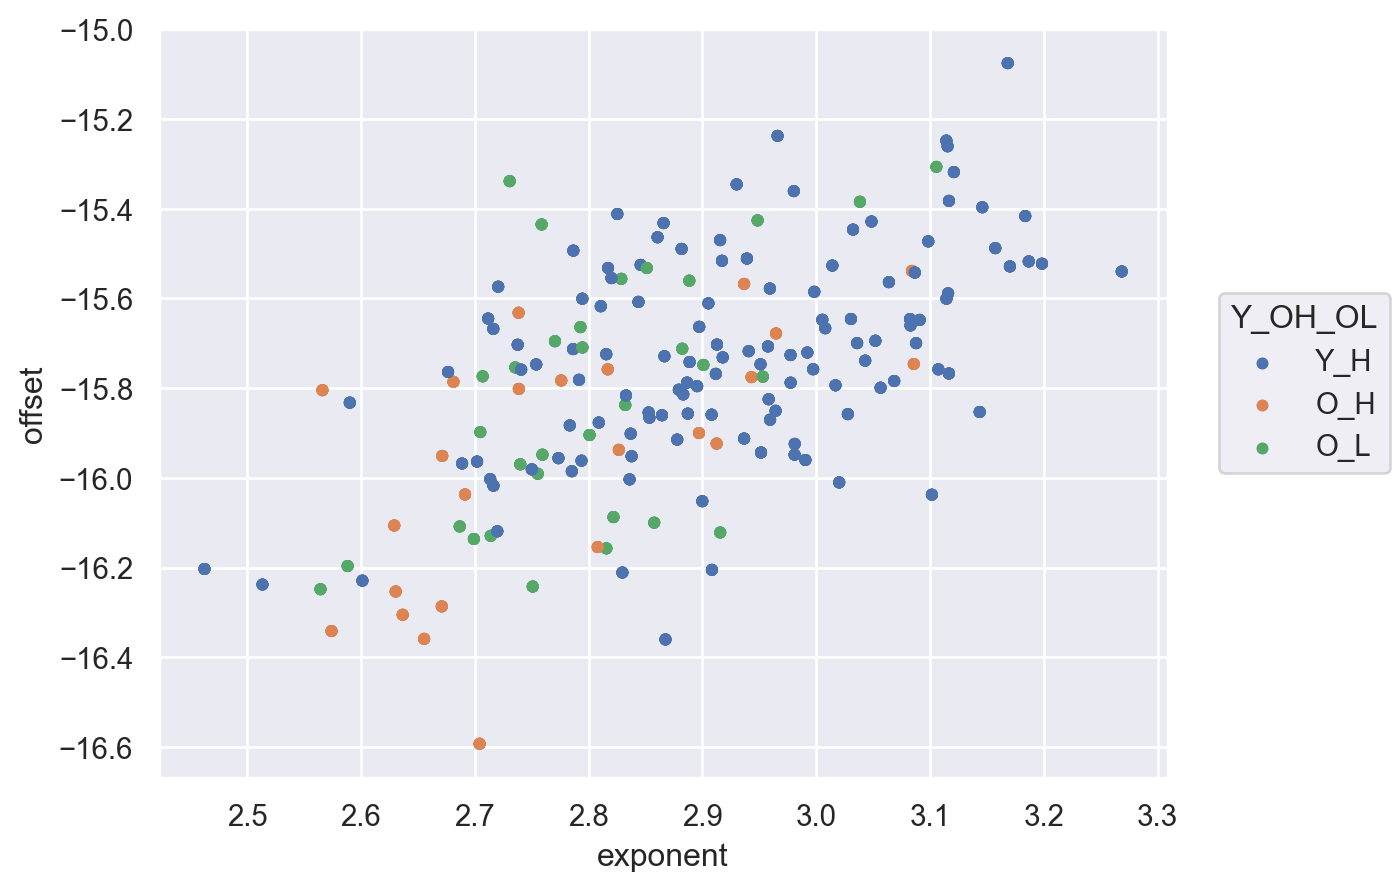

In [164]:

data = ( param_xarray(da_occipital)
    .merge(df_average[["subject", "Y_OH_OL"]]))



(
    so.Plot(data, x="exponent", y="offset", color="Y_OH_OL")
    .add(so.Dot(pointsize=4))
)

In [158]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


KeyboardInterrupt: 

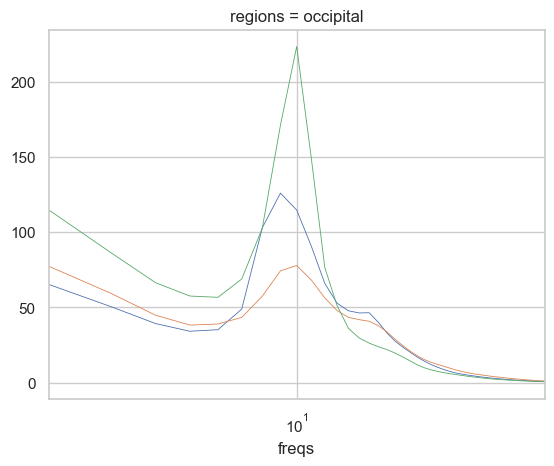

In [138]:
da_multiplied = da_occipital * 10e18
for level in ["O_H", "O_L", "Y_H"]:
    temp_list = data.query('`Y_OH_OL` == @level').loc[:, ["subject"]].T.values.tolist()[0]
    da_multiplied.sel(sub=temp_list).mean(dim="sub").plot(xlim=[2,50], xscale='log')

data_multiplied = param_xarray(da_multiplied )

import seaborn.objects as so
(
    so.Plot(data_multiplied, x="exponent", y="offset", color="Y_OH_OL")
    .add(so.Dot(pointsize=4))
)

2 subjects were exlude they were preprocessed differently (but it shouldnt matter, thay arent in the final set)

# Visualise my results

My range of offset and exponent is not ok

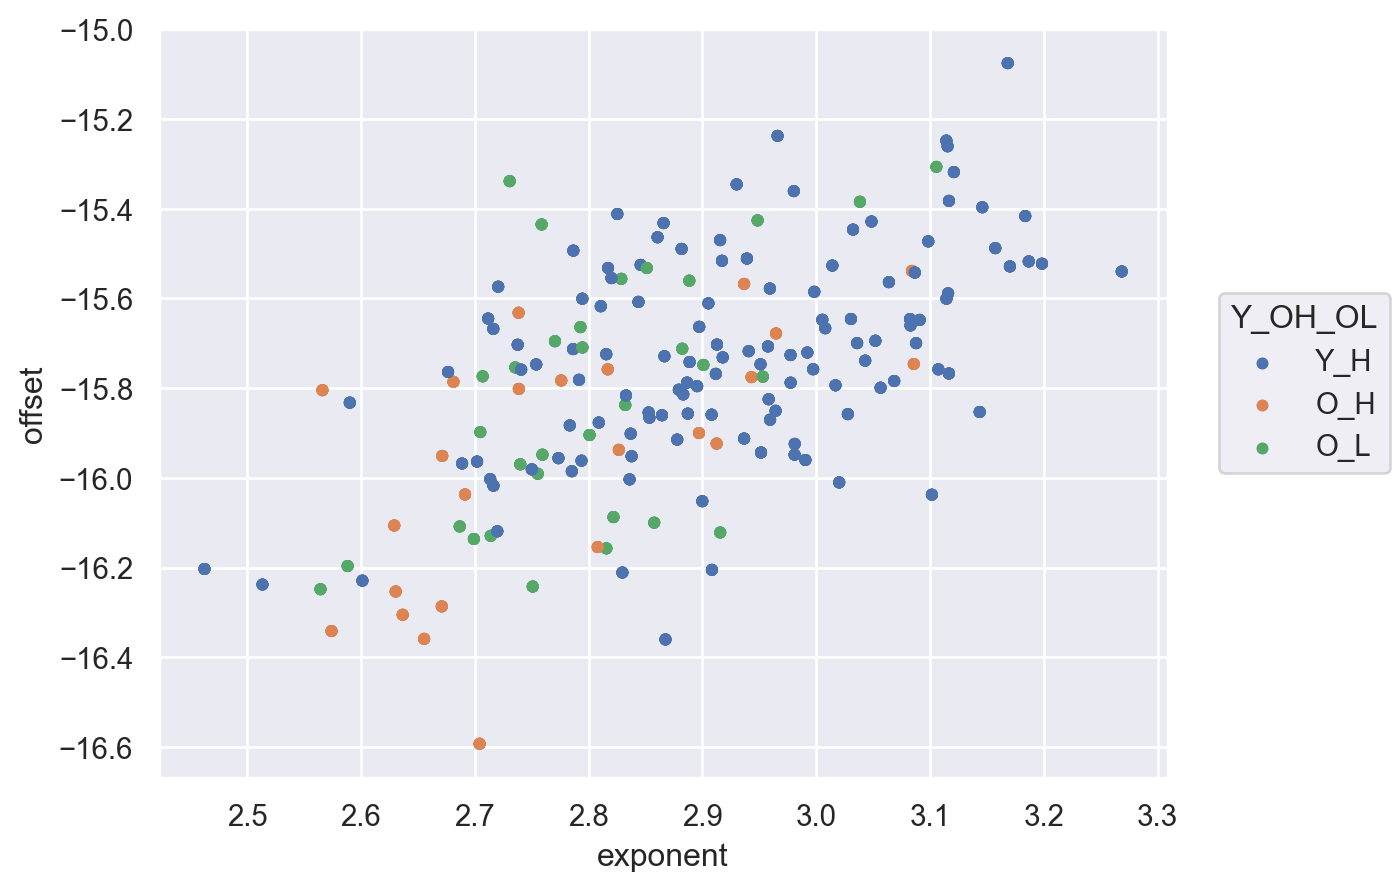

In [90]:
# do nice plotting


Index(['subject', 'CF', 'PW', 'BW', 'offset', 'exponent', 'error', 'r_squared',
       'Y_OH_OL'],
      dtype='object')